### Estudos Miranda: Entenda seus dados com visualização

In [8]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

Author: Caique Miranda

Github username: caiquemiranda

matplotlib: 3.5.2
numpy     : 1.23.0



Você deve entender seus dados para obter os melhores resultados dos algoritmos de aprendizado de máquina. A maneira mais rápida de aprender mais sobre seus dados é usar a visualização de dados. Neste capítulo você descobrirá exatamente como você pode visualizar seus dados de aprendizado de máquina em Python usando Pandas.

#### Gráficos univariados

Nesta seção, veremos três técnicas que você pode usar para entender cada atributo de
seu conjunto de dados de forma independente.

- Histogramas.
- Gráficos de densidade.
- Gráficos de caixa e bigodes.

##### Histogramas

Uma maneira rápida de ter uma ideia da distribuição de cada atributo é observar os histogramas. Histogramas agrupe os dados em compartimentos e forneça uma contagem do número de observações em cada compartimento. De a forma das caixas, você pode rapidamente sentir se um atributo é Gaussiano, distorcido ou ainda tem uma distribuição exponencial. Também pode ajudá-lo a ver possíveis outliers.

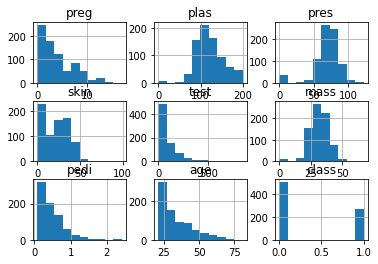

In [2]:
# Univariate Histograms

from matplotlib import pyplot
from pandas import read_csv

filename = 'datasets/diabetes.csv'
names = ['preg', 'plas', 'pres',
         'skin', 'test', 'mass', 
         'pedi', 'age', 'class']

data = read_csv(filename, names=names)
data.hist()
pyplot.show()

Podemos ver que talvez os atributos idade, pedi e teste possam ter uma exponencial distribuição. Também podemos ver que talvez os atributos mass e pres e plas possam ter uma Distribuição gaussiana ou quase gaussiana. Isso é interessante porque muitos aprendizados de máquina as técnicas assumem uma distribuição gaussiana univariada nas variáveis de entrada.

##### Gráficos de densidade

Os gráficos de densidade são outra maneira de obter uma ideia rápida da distribuição de cada atributo. O os gráficos parecem um histograma abstrato com uma curva suave desenhada no topo de cada caixa, muito parecido com o que seu olho tentou fazer com os histogramas.

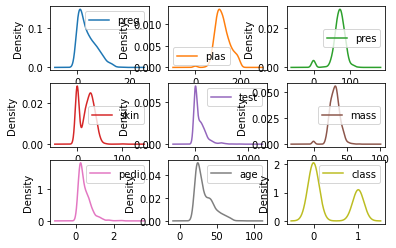

In [3]:
# Univariate Density Plots
data.plot(kind = 'density',
          subplots = True,
          layout = (3, 3),
          sharex = False)

pyplot.show()

Podemos ver que a distribuição de cada atributo é mais clara do que os histogramas.

##### Box and Whisker Plots

Outra maneira útil de revisar a distribuição de cada atributo é usar gráficos de caixa e bigodes ou boxplots para abreviar. Boxplots resumem a distribuição de cada atributo, desenhando uma linha para a mediana (valor do meio) e uma caixa em torno dos percentis 25 e 75 (os 50% do meio de os dados). Os bigodes dão uma ideia da distribuição dos dados e pontos fora dos bigodes mostrar valores discrepantes candidatos (valores que são 1,5 vezes maiores que o tamanho do spread do meio 50% dos dados).

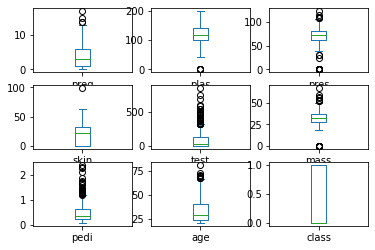

In [4]:
# Box and Whisker Plots

data.plot(kind = 'box',
          subplots = True,
          layout = (3, 3), 
          sharex = False,
          sharey = False)

pyplot.show()

Podemos ver que a distribuição dos atributos é bem diferente. Alguns gostam de idade, teste e pele parecem bastante inclinados para valores menores.

#### Gráficos Multivariados

Esta seção fornece exemplos de dois gráficos que mostram as interações entre várias variáveis em seu conjunto de dados.

- Gráfico de Matriz de Correlação.
- Matriz de gráfico de dispersão.

##### Gráfico de Matriz de Correlação

A correlação dá uma indicação de quão relacionadas as mudanças estão entre duas variáveis. Se dois variáveis mudam na mesma direção em que estão positivamente correlacionadas. Se eles mudarem em sentido oposto direções juntas (uma sobe, outra desce), então elas são negativamente correlacionadas. Você pode calcular a correlação entre cada par de atributos. Isso é chamado de matriz de correlação. Você pode então plotar a matriz de correlação e ter uma ideia de quais variáveis têm alta correlação entre si. Isso é útil saber, porque alguns algoritmos de aprendizado de máquina, como linear e a regressão logística pode ter desempenho ruim se houver variáveis de entrada altamente correlacionadas em seus dados.

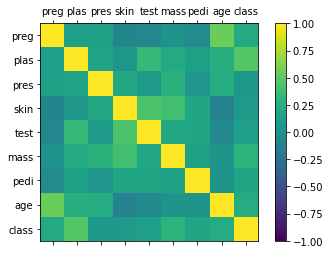

In [5]:
# Correction Matrix Plot

import numpy

correlations = data.corr()

# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, 
                 vmin =- 1,
                 vmax = 1)

fig.colorbar(cax)
ticks = numpy.arange(0, 9, 1)

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(names)
ax.set_yticklabels(names)

pyplot.show()

Podemos ver que a matriz é simétrica, ou seja, o canto inferior esquerdo da matriz é o mesmo que no canto superior direito. Isso é útil, pois podemos ver duas visualizações diferentes nos mesmos dados em um gráfico. Nós também pode ver que cada variável está perfeitamente correlacionada positivamente uma com a outra (como você faria esperavam) na linha diagonal do canto superior esquerdo ao canto inferior direito.

O exemplo não é genérico porque especifica os nomes dos atributos ao longo dos eixos como bem como o número de tiques. Esta receita pode ser mais genérica removendo esses aspectos do seguinte modo:

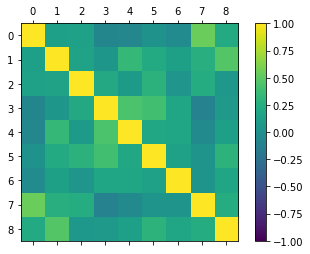

In [6]:
# Correction Matrix Plot (generic)

# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)

cax = ax.matshow(correlations,
                 vmin =- 1,
                 vmax = 1)

fig.colorbar(cax)
pyplot.show()

Gerando o gráfico, você pode ver que ele fornece a mesma informação, embora seja um um pouco mais difícil ver quais atributos estão correlacionados por nome. Use este gráfico genérico como um primeiro corte para entender as correlações em seu conjunto de dados e personalize-o como no primeiro exemplo em ordem para ler ou dados mais específicos, se necessário.

##### Matriz de gráfico de dispersão(Scatter Plot)

Um gráfico de dispersão mostra a relação entre duas variáveis como pontos em duas dimensões, uma eixo para cada atributo. Você pode criar um gráfico de dispersão para cada par de atributos em seus dados. Desenhar todos esses gráficos de dispersão juntos é chamado de matriz de gráfico de dispersão. Gráficos de dispersão são úteis para detectar relacionamentos estruturados entre variáveis, como se você pudesse resumir o relação entre duas variáveis com uma linha. Atributos com relacionamentos estruturados podem também ser correlacionados e bons candidatos para remoção de seu conjunto de dados.

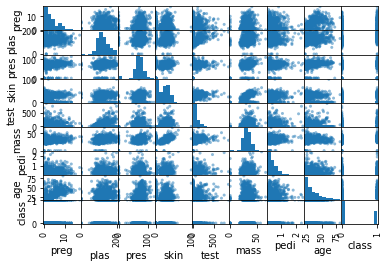

In [7]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix

scatter_matrix(data)
pyplot.show()

Assim como o gráfico da matriz de correlação acima, a matriz do gráfico de dispersão é simétrica. Isso é útil olhar para as relações de pares de diferentes perspectivas. Porque há pouco ponto de desenhar um gráfico de dispersão de cada variável consigo mesma, a diagonal mostra histogramas de cada atributo.

### Fim.